# Real time: FRB 220310aaam (SNR68)

In [1]:
from burstfit.fit import BurstFit
from burstfit.data import BurstData
from burstfit.model import Model, SgramModel
from burstfit.utils.plotter import plot_me
from burstfit.utils.functions import pulse_fn_vec, sgram_fn_vec, sgram_fn, gauss, gauss_norm, model_free_4,model_free, power_law
from burstfit.utils.plotter import plot_fit_results, plot_2d_fit 
from burstfit.io import BurstIO
import logging
import numpy as np
import math
import matplotlib.pyplot as plt
# use Liam's function to read in filterbank files 
import sys
sys.path.insert(1, '/home/ubuntu/gechen/software')
import filplot_funcs_gc as ff

#from burstfit.utils.functions import gauss_norm2, pulse_fn_vec, sgram_fn_vec 
%matplotlib inline 


# input variables 
candidate = '220310aaam'
datestring = '2022_3_10_1_19_25'
beam = 150
corr = 'corr09'
dm_heimdall = 462.7
width_heimdall = 4 
snr_heimdall = 68.4
mask_chans=[] 

fil_file ='/data/dsa110/T1/'+corr + '/' + datestring + '/fil_'+candidate+'/'+candidate+'_'+str(beam)+'.fil'
#fil_file = '/home/ubuntu/vikram/scratch/220319aaeb.fil'
save_name = candidate + '_beam_'+str(beam)
save_dir = '/home/ubuntu/gechen/burstfit_tests_outputs/' 


#data = ff.proc_cand_fil(fil_file, dm, width, nfreq_plot=64, ndm=64)[0]
#data_t = data.mean(0)

logging_format = "%(asctime)s - %(funcName)s -%(name)s - %(levelname)s - %(message)s"
logging.basicConfig(
    level=logging.INFO,
    format=logging_format,
)
# create burst object 
bd = BurstData(
    fp=fil_file,
    dm=dm_heimdall ,
    tcand=0.5, # pulse starting time in s.
    width=width_heimdall,  
    snr=snr_heimdall
)

bd.prepare_data()

# number of channels after binning 
# requires each channel bin to have SNR_min 
# snr_heimdall was calculated with all 256 channels binned into one 
SNR_min = 5 # check?  
n_per_bin = int(256. / (1.0*snr_heimdall / SNR_min)**2) 
if n_per_bin <= 1:
    n_per_bin = 1
elif not math.log(n_per_bin, 2).is_integer():
    n_per_bin = 2 ** (int(np.log2(n_per_bin))+1)
    
nfreq = int(256 / n_per_bin) 
print(nfreq)
#nfreq = 4

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/utils/plotter.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/ubuntu/anac

datacite/tind env not found. Cannot use datacite API


2022-05-16 23:16:35,019 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2022-05-16 23:16:35,703 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.2s.
2022-05-16 23:16:35,706 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2022-05-16 23:16:35,763 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (40.446149181375624, 17.948576498112292)


256


## de-disperse data (or read from file) and chop near the burst time

In [2]:
# # save the de-dispersed data to file (de-dispersion takes long time)
# nfreq = 4

# data = ff.proc_cand_fil(fil_file, bd.dm, bd.width, nfreq_plot=nfreq, ndm=64)[0]
# np.save('%s_%d.txt'%(candidate, nfreq), data, allow_pickle=False)

In [3]:
# chop near the burst region and plot (adjust as needed)
i_low = int(0.500/bd.tsamp - 5*bd.width)
i_high = int(0.500/bd.tsamp + 5*bd.width)

Text(0.5,0,'time sample')

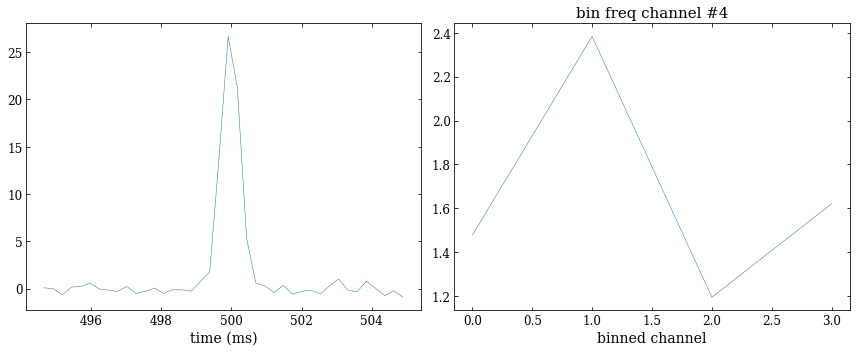

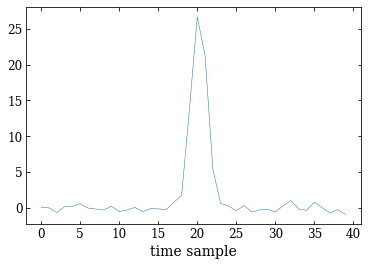

In [4]:
# read in de-dispersed data file
nfreq = 4

data = np.load('%s_%d.txt.npy'%(candidate, nfreq))

# chop near the burst region and plot 
data_burst = data[:, i_low: i_high] # change to x * width 
t_burst_ms = [i * bd.tsamp * 1e3 for i in range(i_low, i_high)]

fig1, ax1 = plt.subplots(1, 2, figsize=(12, 5)) 
#fig1.set_size_inches(12., 5.)
ax1[0].plot(t_burst_ms, data_burst.mean(0))
ax1[0].set_xlabel('time (ms)')
ax1[1].plot(data_burst.mean(1))
ax1[1].set_xlabel('binned channel')
ax1[1].set_title('bin freq channel #%d'%nfreq)
plt.tight_layout()

plt.figure()
plt.plot(data_burst.mean(0))
plt.xlabel('time sample')

## Fit with models

### bf_S1T2_cx: model-free spectrum + gaussian with scattering profile + x components

self.function_input_names:  ['S', 'mu', 'sigma', 'tau']
snames: ['c0', 'c1', 'c2', 'c3']
self.function_input_names:  ['c0', 'c1', 'c2', 'c3']


2022-05-16 23:16:41,243 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-05-16 23:16:41,245 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-05-16 23:16:41,249 - tests -root - INFO - P values: T-test (0.70839), Kruskal (0.55460), KS (0.63514), F-test (0.49630)
2022-05-16 23:16:41,251 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-05-16 23:16:41,255 - tests -root - INFO - P values: T-test (0.00008), Kruskal (0.00001), KS (0.00005), F-test (0.00000)
2022-05-16 23:16:41,257 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-05-16 23:16:41,261 - tests -root - INFO - P values: T-test (0.00007), Kruskal (0.00000), KS (0.00001), F-test (0.00000)
2022-05-16 23:16:41,263 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-05-16 23:16:41,265 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 1
2022-05-16 23:16:41,283 - initial_profilefi

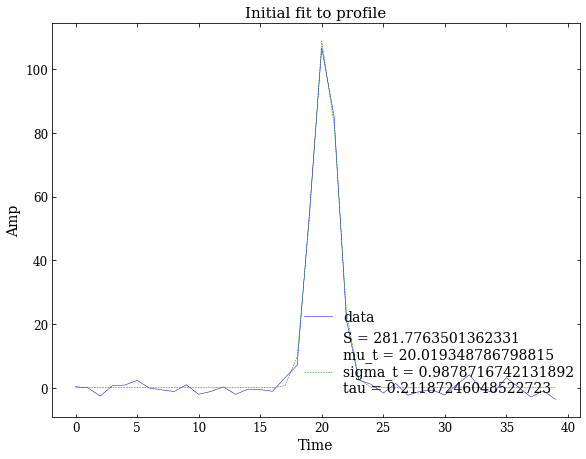

2022-05-16 23:16:41,477 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-05-16 23:16:41,481 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_4 at 0x7f1eb1b0c400>
[0.2895338  0.4661315  0.24087682 0.29644954]


2022-05-16 23:16:41,488 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-05-16 23:16:41,490 - initial_spectrafit -burstfit.fit - INFO - c0: 0.289533793926239 +- 0.0
2022-05-16 23:16:41,492 - initial_spectrafit -burstfit.fit - INFO - c1: 0.4661315083503723 +- 0.0
2022-05-16 23:16:41,493 - initial_spectrafit -burstfit.fit - INFO - c2: 0.24087682366371155 +- 0.0
2022-05-16 23:16:41,495 - initial_spectrafit -burstfit.fit - INFO - c3: 0.29644954204559326 +- 0.0


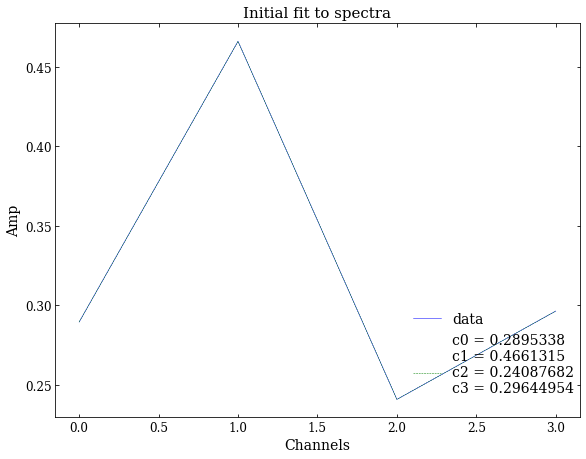

2022-05-16 23:16:41,661 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-05-16 23:16:41,663 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.2895338, 0.4661315, 0.24087682, 0.29644954, 281.7763501362331, 20.019348786798815, 0.9878716742131892, 0.21187246048522723, 462.7]
2022-05-16 23:16:41,959 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-05-16 23:16:41,961 - sgram_fit -burstfit.fit - INFO - c0: 0.257198438186727 +- 0.1944681293297542
2022-05-16 23:16:41,964 - sgram_fit -burstfit.fit - INFO - c1: 0.4701729276381501 +- 0.3291596081476308
2022-05-16 23:16:41,966 - sgram_fit -burstfit.fit - INFO - c2: 0.20883478891808815 +- 0.07979269082382792
2022-05-16 23:16:41,968 - sgram_fit -burstfit.fit - INFO - c3: 0.3048512458897512 +- 0.3274841437568297
2022-05-16 23:16:41,971 - sgram_fit -burstfit.fit - INFO - S: 260.5691711268109 +- 32429.305653184212
2022-05-16 23:16:41,973 - sgram_fit -burstfit.fit - INFO - mu_t: 20.

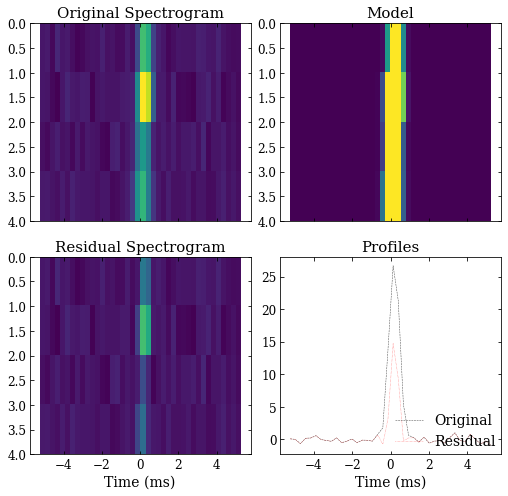

2022-05-16 23:16:42,330 - model -burstfit.fit - INFO - Making model.
2022-05-16 23:16:42,333 - model -burstfit.fit - INFO - Found 1 components.
2022-05-16 23:16:42,337 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-05-16 23:16:42,339 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-05-16 23:16:42,342 - model -burstfit.fit - INFO - Making model.
2022-05-16 23:16:42,344 - model -burstfit.fit - INFO - Found 1 components.
2022-05-16 23:16:42,348 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 14.51243858160282
2022-05-16 23:16:42,350 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-05-16 23:16:42,352 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-05-16 23:16:42,355 - tests -root - INFO - P values: T-test (0.70839), Kruskal (0.55460), KS (0.63514), F-test (0.49630)
2022-05-16 23:16:42,357 - run_

bf_S1T2_c1.calc_redchisq()= 14.51243858160282


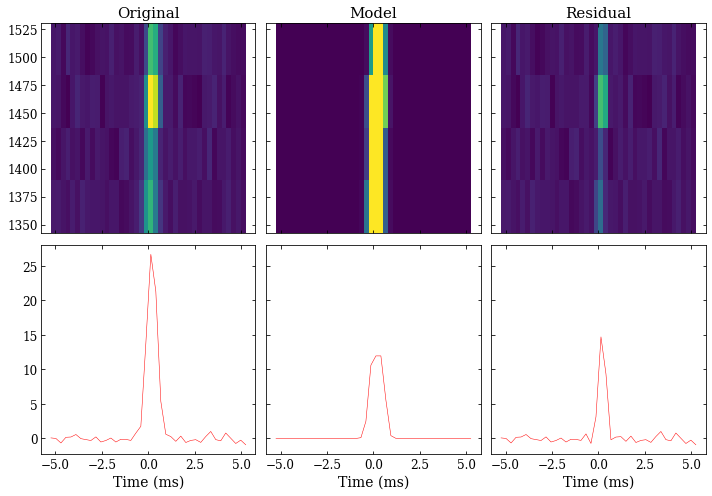

In [5]:
# bf_S1T2_c1: single component 
#data_burst = data[:,int(0.45/bd.tsamp): int(0.55/bd.tsamp)] # change to x * width 
#fit models  
# For pulse, we will use a gaussian convolved with an exponential model 
# S: Area of the pulse (fluence)
# mu: means of gaussians for each channel
# sigma: sigma of gaussian
# tau: scattering timescale for each channel

ncomp = 1 

pnames = ['S', 'mu_t', 'sigma_t', 'tau']
pulseModel = Model(pulse_fn_vec, param_names=pnames)
#profile_bounds=[(0, 480, 0, 0),(np.inf, 510, 10*bd.width, np.inf)]


nfreq = 4
# For spectrum, try model-free  
nfreq_model = nfreq # try less 
snames = [0] * nfreq_model

for i in range(nfreq_model):
    snames[i] = 'c'+str(i)

print('snames:', snames)
spectraModel = Model(model_free_4, param_names=snames)
#spectraModel = Model(model_free, param_names=snames)





sgram_mask = np.full(np.shape(data_burst), False)
#sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn_vec, 
#                        mask=sgram_mask, clip_fac=bd.clip_fac, other_param_names=["DM"])

sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn, 
                        mask=sgram_mask, clip_fac=bd.clip_fac)#, other_param_names=["DM"])

#sgram_bounds=((0, 0.45, 0),(np.inf, 0.55, np.inf)) # did not work when only set up bounds but do not chop data 

# Provide basic candidate information to `BurstFit`: sgram, model, DM, width, RFI mask, etc 
# initial fit: use heimdall results 
# rename bf_S1T2_c1 for later model selection 
bf_S1T2_c1 = BurstFit(
    sgram_model=sgramModel,
    sgram=data_burst, 
    width=width_heimdall,
    dm=dm_heimdall,
    foff=bd.foff * 1024 / nfreq,
    fch1=bd.fch1,
    tsamp=bd.tsamp,
    clip_fac=bd.clip_fac,
    mask= sgram_mask, 
    mcmcfit=False,
    #comp_num = 1, 
)


# Some setting up before we do the fitting 
bf_S1T2_c1.validate()
bf_S1T2_c1.precalc()


# fit tests
#bf_S1T2_c1.initial_profilefit(bounds = profile_bounds, plot = True)
#bf_S1T2_c1.initial_spectrafit(plot = True)

#bf_S1T2_c1.fitcycle(plot=True) # fit for one component.
bf_S1T2_c1.fitall(plot=True, max_ncomp = ncomp) # fit all componnts 
print('bf_S1T2_c1.calc_redchisq()=', bf_S1T2_c1.calc_redchisq())

# plot fit for all components 
plot_fit_results(bf_S1T2_c1.sgram, bf_S1T2_c1.sgram_model.evaluate, bf_S1T2_c1.sgram_params['all'][1]['popt'], 
                 bf_S1T2_c1.tsamp, bf_S1T2_c1.fch1, bf_S1T2_c1.foff, show=True, save=True, outname=save_name+'2d_fit_res_curvfit', outdir=save_dir)
dm_fit, dm_fit_err = bf_S1T2_c1.sgram_params['all'][1]['popt'][-1], bf_S1T2_c1.sgram_params['all'][1]['perr'][-1]



In [18]:
bf_S1T2_c1.sgram_params 
bd.tsamp 

0.000262144

In [8]:
#bf_S1T2_c1.off_pulse_ts_std

In [17]:
# mcmc_kwargs = {}
# mcmc_kwargs = {'nwalkers':60, 'nsteps':int(1e4),
#            'skip':500, 'ncores':4, 
#            'start_pos_dev':0.01,
#            'prior_range':0.8, 
#            'save_results':True,
#            'outname':'test_file'}

# bf_S1T2_c1.run_mcmc(plot=True, **mcmc_kwargs)


self.function_input_names:  ['S', 'mu', 'sigma', 'tau']
snames: ['c0', 'c1', 'c2', 'c3']
self.function_input_names:  ['c1', 'c2', 'c3', 'c4']


2022-04-25 22:23:14,589 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-04-25 22:23:14,591 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-04-25 22:23:14,595 - tests -root - INFO - P values: T-test (0.16742), Kruskal (0.17079), KS (0.16007), F-test (0.99749)
2022-04-25 22:23:14,597 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-04-25 22:23:14,601 - tests -root - INFO - P values: T-test (0.00006), Kruskal (0.00000), KS (0.00017), F-test (0.00000)
2022-04-25 22:23:14,603 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-04-25 22:23:14,606 - tests -root - INFO - P values: T-test (0.00011), Kruskal (0.00001), KS (0.00005), F-test (0.00000)
2022-04-25 22:23:14,608 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-04-25 22:23:14,610 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 1
2022-04-25 22:23:14,630 - initial_profilefi

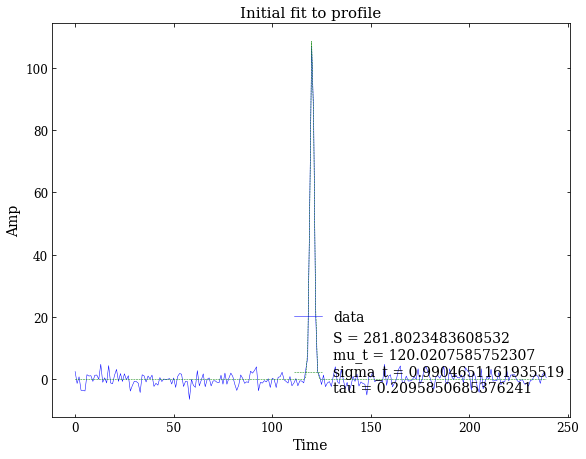

2022-04-25 22:23:14,814 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-04-25 22:23:14,817 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_4 at 0x7f5e95c1b730>
[0.2895338  0.4661315  0.24087682 0.29644954]


2022-04-25 22:23:14,824 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-04-25 22:23:14,827 - initial_spectrafit -burstfit.fit - INFO - c0: 0.289533793926239 +- 0.0
2022-04-25 22:23:14,829 - initial_spectrafit -burstfit.fit - INFO - c1: 0.4661315083503723 +- 0.0
2022-04-25 22:23:14,832 - initial_spectrafit -burstfit.fit - INFO - c2: 0.24087682366371155 +- 0.0
2022-04-25 22:23:14,835 - initial_spectrafit -burstfit.fit - INFO - c3: 0.29644954204559326 +- 0.0


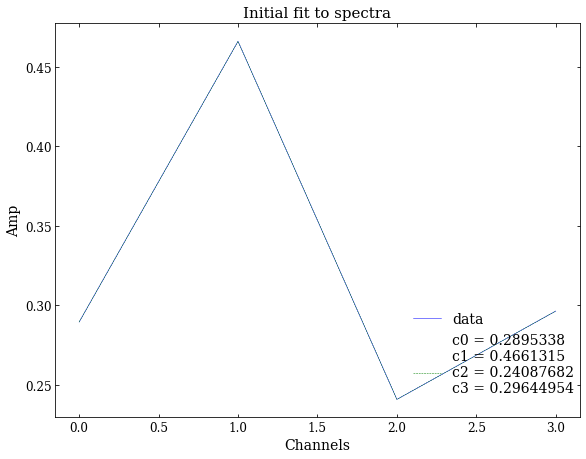

2022-04-25 22:23:15,173 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-04-25 22:23:15,175 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.2895338, 0.4661315, 0.24087682, 0.29644954, 281.8023483608532, 120.0207585752307, 0.9904651161935519, 0.2095850685376241, 462.7]
2022-04-25 22:23:15,394 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-04-25 22:23:15,396 - sgram_fit -burstfit.fit - INFO - c0: 0.21154533183079258 +- 0.23280780106694898
2022-04-25 22:23:15,398 - sgram_fit -burstfit.fit - INFO - c1: 0.36548294550156807 +- 0.32279547116719465
2022-04-25 22:23:15,401 - sgram_fit -burstfit.fit - INFO - c2: 0.18788592760030126 +- 0.041676090659105595
2022-04-25 22:23:15,403 - sgram_fit -burstfit.fit - INFO - c3: 0.24516133427611259 +- 0.10445742702400507
2022-04-25 22:23:15,405 - sgram_fit -burstfit.fit - INFO - S: 282.6053258032384 +- 52.91961747443516
2022-04-25 22:23:15,407 - sgram_fit -burstfit.fit - INFO - mu_t

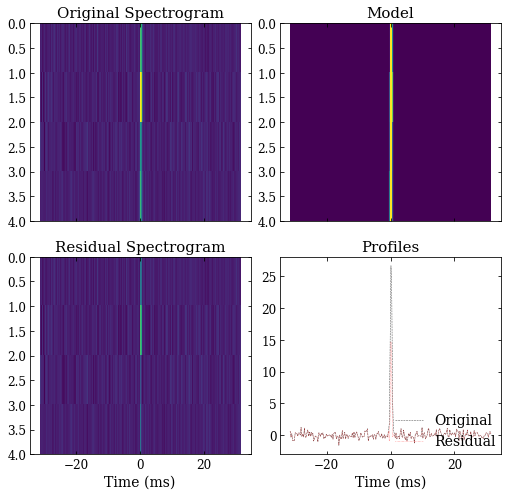

2022-04-25 22:23:15,738 - model -burstfit.fit - INFO - Making model.
2022-04-25 22:23:15,741 - model -burstfit.fit - INFO - Found 1 components.
2022-04-25 22:23:15,745 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-04-25 22:23:15,746 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-04-25 22:23:15,748 - model -burstfit.fit - INFO - Making model.
2022-04-25 22:23:15,750 - model -burstfit.fit - INFO - Found 1 components.
2022-04-25 22:23:15,754 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 2.8275896049570792
2022-04-25 22:23:15,756 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-04-25 22:23:15,758 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-04-25 22:23:15,762 - tests -root - INFO - P values: T-test (0.16742), Kruskal (0.17079), KS (0.16007), F-test (0.99749)
2022-04-25 22:23:15,764 - run

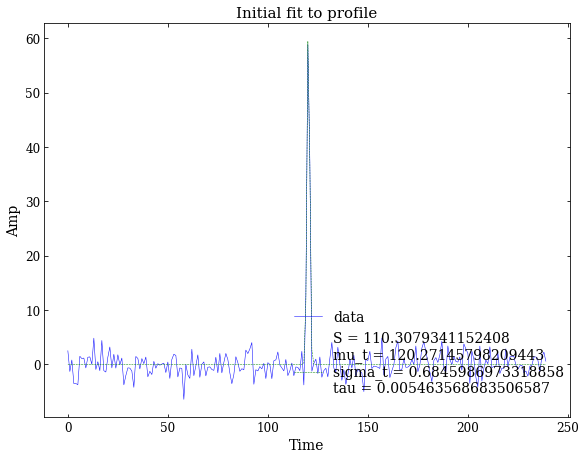

2022-04-25 22:23:15,956 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-04-25 22:23:15,959 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 2


<function model_free_4 at 0x7f5e95c1b730>
[0.2887304624007534 0.6172037558754658 0.11800807017744781
 0.24084588549341912]


2022-04-25 22:23:15,966 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-04-25 22:23:15,968 - initial_spectrafit -burstfit.fit - INFO - c0: 0.2887304624007534 +- 0.0
2022-04-25 22:23:15,970 - initial_spectrafit -burstfit.fit - INFO - c1: 0.6172037558754658 +- 0.0
2022-04-25 22:23:15,971 - initial_spectrafit -burstfit.fit - INFO - c2: 0.11800807017744781 +- 0.0
2022-04-25 22:23:15,973 - initial_spectrafit -burstfit.fit - INFO - c3: 0.24084588549341912 +- 0.0


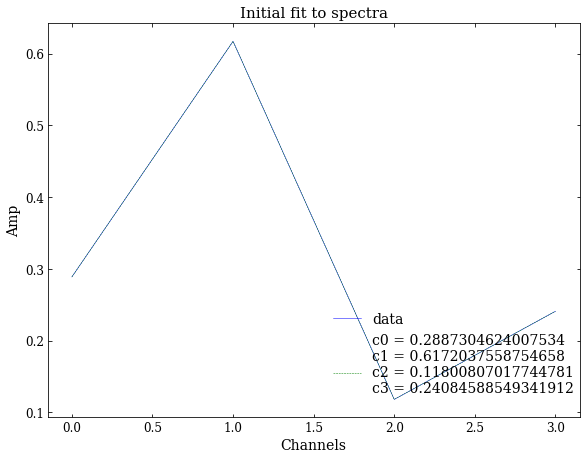

2022-04-25 22:23:16,119 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 2
2022-04-25 22:23:16,121 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.2887304624007534, 0.6172037558754658, 0.11800807017744781, 0.24084588549341912, 110.3079341152408, 120.27145798209443, 0.6845986973318858, 0.005463568683506587, 462.7]
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
2022-04-25 22:23:16,267 - run_fit -burstfit.curvefit - WARNING - Fit errors are not finite. Retrying with p0+-(0.2*p0) bounds
2022-04-25 22:23:16,506 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-04-25 22:23:16,509 - sgram_fit -burstfit.fit - INFO - c0: 0.34647542464698067 +- 0.12695101118657767
2022-04-25 22:23:16,511 - sgram_fit -burstfit.fit - INFO - c1: 0.5006522685534961 +- 0.200694700512943
2022-04-25 22:23:16,514 - 

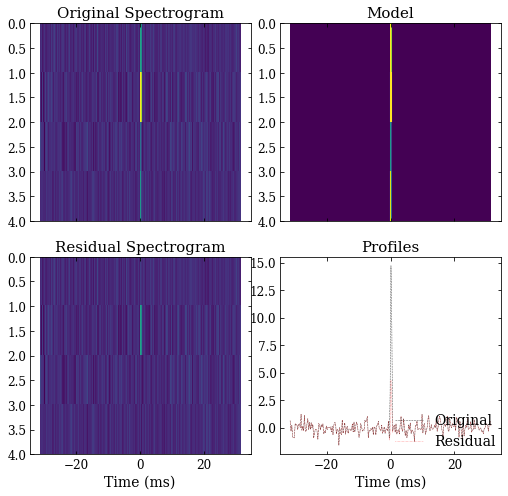

2022-04-25 22:23:16,876 - model -burstfit.fit - INFO - Making model.
2022-04-25 22:23:16,879 - model -burstfit.fit - INFO - Found 2 components.
2022-04-25 22:23:16,884 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-04-25 22:23:16,885 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-04-25 22:23:16,887 - model -burstfit.fit - INFO - Making model.
2022-04-25 22:23:16,889 - model -burstfit.fit - INFO - Found 2 components.
2022-04-25 22:23:16,894 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 2.85760811472385
2022-04-25 22:23:16,895 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-04-25 22:23:16,897 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-04-25 22:23:16,901 - tests -root - INFO - P values: T-test (0.16742), Kruskal (0.17079), KS (0.16007), F-test (0.99749)
2022-04-25 22:23:16,903 - run_t

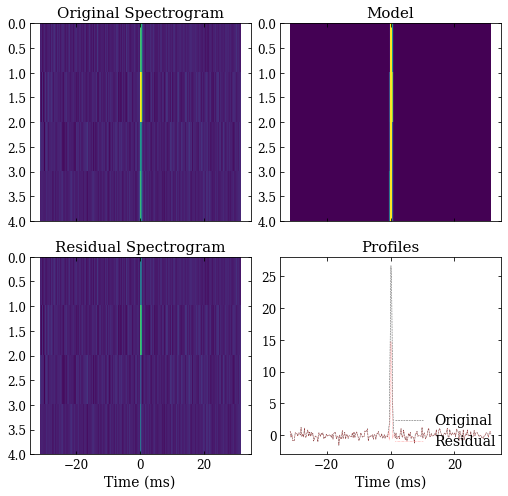

2022-04-25 22:23:19,794 - model -burstfit.fit - INFO - Making model.
2022-04-25 22:23:19,795 - model -burstfit.fit - INFO - Found 2 components.
2022-04-25 22:23:19,798 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-04-25 22:23:19,799 - get_off_pulse_region -burstfit.fit - INFO - Using sgram all-component-fit parameters.
2022-04-25 22:23:19,801 - model -burstfit.fit - INFO - Making model.
2022-04-25 22:23:19,802 - model -burstfit.fit - INFO - Found 2 components.
2022-04-25 22:23:19,806 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 2.8532886553247354
2022-04-25 22:23:19,807 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-04-25 22:23:19,808 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-04-25 22:23:19,812 - tests -root - INFO - P values: T-test (0.16742), Kruskal (0.17079), KS (0.16007), F-test (0.99749)
2022-04-25 22:2

{1: {'popt': [0.21154533183079258,
   0.36548294550156807,
   0.18788592760030126,
   0.24516133427611259,
   282.6053258032384,
   120.25843054081261,
   0.8517558080618562,
   0.22795831129597394,
   462.3214909722111],
  'perr': array([2.32807801e-01, 3.22795471e-01, 4.16760907e-02, 1.04457427e-01,
         5.29196175e+01, 2.07706083e-01, 2.03694902e-01, 2.88573029e-02,
         1.26488302e-01])},
 2: {'popt': [0.34647542464698067,
   0.5006522685534961,
   0.12451494084285235,
   0.23957837365470472,
   93.35292605767282,
   120.29293386323177,
   0.5476789584656523,
   0.005463568683506587,
   462.5040088697783],
  'perr': array([ 0.12695101,  0.2006947 ,  0.02797366,  0.04515369, 27.54228223,
          0.15399666,  0.17516177,  0.        ,  0.04137762])},
 'all': {1: {'popt': [0.20920701979801862,
    0.3643118307920313,
    0.1843655221282974,
    0.24530961000360307,
    282.6013328004332,
    120.27007273478867,
    0.8407421073921136,
    0.22825461819275417,
    462.32356921

In [16]:
# bf_S1T2_c2: two components
#data_burst = data[:,int(0.45/bd.tsamp): int(0.55/bd.tsamp)] # change to x * width 
#fit models  
# For pulse, we will use a gaussian convolved with an exponential model 
# S: Area of the pulse (fluence)
# mu: means of gaussians for each channel
# sigma: sigma of gaussian
# tau: scattering timescale for each channel
ncomp = 2 

pnames = ['S', 'mu_t', 'sigma_t', 'tau']
pulseModel = Model(pulse_fn_vec, param_names=pnames)
profile_bounds=[(0, 480, 0, 0),(np.inf, 510, 10*bd.width, np.inf)]


nfreq = 4
# For spectrum, try model-free  
nfreq_model = nfreq # try less 
snames = [0] * nfreq_model

for i in range(nfreq_model):
    snames[i] = 'c'+str(i)

print('snames:', snames)
spectraModel = Model(model_free_4, param_names=snames)
#spectraModel = Model(model_free, param_names=snames)





sgram_mask = np.full(np.shape(data_burst), False)
#sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn_vec, 
#                        mask=sgram_mask, clip_fac=bd.clip_fac, other_param_names=["DM"])

sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn, 
                        mask=sgram_mask, clip_fac=bd.clip_fac)#, other_param_names=["DM"])

#sgram_bounds=((0, 0.45, 0, -np.inf),(np.inf, 0.55, np.inf, np.inf)) # did not work when only set up bounds but do not chop data 

# Provide basic candidate information to `BurstFit`: sgram, model, DM, width, RFI mask, etc 
# initial fit: use heimdall results 
# rename bf_S1T2_c2 for later model selection 
bf_S1T2_c2 = BurstFit(
    sgram_model=sgramModel,
    sgram=data_burst, 
    width=width_heimdall,
    dm=dm_heimdall,
    foff=bd.foff * 1024 / nfreq,
    fch1=bd.fch1,
    tsamp=bd.tsamp,
    clip_fac=bd.clip_fac,
    mask= sgram_mask, 
    mcmcfit=False,
    #comp_num = 1, 
)


# Some setting up before we do the fitting 
bf_S1T2_c2.validate()
bf_S1T2_c2.precalc()


# fit tests
#bf_S1T2_c2.initial_profilefit(bounds = profile_bounds, plot = True)
#bf_S1T2_c2.initial_spectrafit(plot = True)

#bf_S1T2_c2.fitcycle(plot=True) # fit for one component.
bf_S1T2_c2.fitall(plot=True, max_ncomp = ncomp) # fit all componnts 
bf_S1T2_c2.calc_redchisq()

# plot fit for all components 
# plot_fit_results(bf_S1T2_c2.sgram, bf_S1T2_c2.sgram_model.evaluate, bf_S1T2_c2.sgram_params['all'][1]['popt'], 
#                  bf_S1T2_c2.tsamp, bf_S1T2_c2.fch1, bf_S1T2_c2.foff, show=True, save=True, outname=save_name+'2d_fit_res_curvfit', outdir=save_dir)
#dm_fit, dm_fit_err = bf_S1T2_c2.sgram_params['all'][1]['popt'][-1], bf_S1T2_c2.sgram_params['all'][1]['perr'][-1]

bf_S1T2_c2.sgram_params

### bf_S1T1_cx: model-free spectrum + gaussian profile NO scattering + x-component 

In [17]:
# bf_S1T1_c1: single component 
#data_burst = data[:,int(0.45/bd.tsamp): int(0.55/bd.tsamp)] # change to x * width 
#fit models  
# For pulse, we will use a gaussian convolved with an exponential model 
# S: Area of the pulse (fluence)
# mu: means of gaussians for each channel
# sigma: sigma of gaussian
# tau: scattering timescale for each channel

ncomp = 1 

pnames = ['S', 'mu_t', 'sigma_t'] # , 'tau'
pulseModel = Model(gauss, param_names=pnames)
profile_bounds=[(0, 0, 0),(np.inf, np.shape(data_burst)[1], np.inf)]


nfreq = 4
# For spectrum, try model-free  
nfreq_model = nfreq # try less 
snames = [0] * nfreq_model

for i in range(nfreq_model):
    snames[i] = 'c'+str(i)

print('snames:', snames)
spectraModel = Model(model_free_4, param_names=snames)
#spectraModel = Model(model_free, param_names=snames)





sgram_mask = np.full(np.shape(data_burst), False)
#sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn_vec, 
#                        mask=sgram_mask, clip_fac=bd.clip_fac, other_param_names=["DM"])

sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn, 
                        mask=sgram_mask, clip_fac=bd.clip_fac)#, other_param_names=["DM"])

sgram_bounds=((-np.inf, -np.inf, -np.inf, -np.inf, 0, 0, 0),(np.inf, np.inf, np.inf, np.inf, np.inf, np.shape(data_burst)[1], np.inf)) # did not work when only set up bounds but do not chop data 

# Provide basic candidate information to `BurstFit`: sgram, model, DM, width, RFI mask, etc 
# initial fit: use heimdall results 
# rename bf_S1T1_c1 for later model selection 
bf_S1T1_c1 = BurstFit(
    sgram_model=sgramModel,
    sgram=data_burst, 
    width=width_heimdall,
    dm=dm_heimdall,
    foff=bd.foff * 1024 / nfreq,
    fch1=bd.fch1,
    tsamp=bd.tsamp,
    clip_fac=bd.clip_fac,
    mask= sgram_mask, 
    mcmcfit=False,
    #comp_num = 1, 
)


# Some setting up before we do the fitting 
bf_S1T1_c1.validate()
bf_S1T1_c1.precalc()


# fit tests
bf_S1T1_c1.initial_profilefit(bounds = profile_bounds, plot = True)
#bf_S1T1_c1.initial_spectrafit(plot = True)

bf_S1T1_c1.fitcycle(plot=True, profile_bounds = profile_bounds) # fit for one component.
bf_S1T1_c1.fitall(plot=True, max_ncomp = ncomp) # fit all componnts 
print('bf_S1T1_c1.calc_redchisq()=', bf_S1T1_c1.calc_redchisq())

# plot fit for all components 
# plot_fit_results(bf_S1T1_c1.sgram, bf_S1T1_c1.sgram_model.evaluate, bf_S1T1_c1.sgram_params['all'][1]['popt'], 
#                  bf_S1T1_c1.tsamp, bf_S1T1_c1.fch1, bf_S1T1_c1.foff, show=True, save=True, outname=save_name+'2d_fit_res_curvfit', outdir=save_dir)
#dm_fit, dm_fit_err = bf_S1T1_c1.sgram_params['all'][1]['popt'][-1], bf_S1T1_c1.sgram_params['all'][1]['perr'][-1]

#bf_S1T1_c1.sgram_params

self.function_input_names:  ['S', 'mu', 'sigma']
snames: ['c0', 'c1', 'c2', 'c3']
self.function_input_names:  ['c1', 'c2', 'c3', 'c4']


2022-04-25 22:23:33,226 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 1


RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

In [ ]:
# save fitting results 
bd.prepare_data()
bio = BurstIO(bf, bd)
d = bio.save_results(outname=save_name+"_fit_results.json", outdir=save_dir)  
print(d['param_names'])

In [19]:
# # saving key burst paramters 
# mu_f_mcmc, sigma_f_mcmc, s_mcmc, mu_t_mcmc, sigma_t_mcmc, tau_mcmc, dm_mcmc = bf.mcmc_params[1]['popt']
# mu_f_mcmc_err, sigma_f_mcmc_err, s_mcmc_err, mu_t_mcmc_err, sigma_t_mcmc_err, tau_mcmc_err, dm_mcmc_err = bf.mcmc_params[1]['perr']

# t0 = 0.45 + mu_t_mcmc * bd.tsamp
# t0_err = [i * bd.tsamp for i in mu_t_mcmc_err] 

# width_ms = sigma_t_mcmc * bd.tsamp * 1e3 # in ms
# width_ms_err = [i * bd.tsamp for i in sigma_t_mcmc_err] 

# # with open(save_dir+save_name+"_fit_key_results.txt") as f:
# #     print('mu_f_mcmc, sigma_f_mcmc, s_mcmc, mu_t_mcmc, sigma_t_mcmc, tau_mcmc, dm_mcmc')
# #     print(bf.mcmc_params[1]['popt'])
# #     print('lower, upper bounds')
# #     print(bf.mcmc_params[1]['perr'])

# #outname=save_name+"_fit_results.json", outdir=save_dir